In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.misc import imsave
from __future__ import unicode_literals
import pandas as pd
%matplotlib inline

In [10]:
def config_axis(ax):
    ax.grid(True)
    ax.legend(loc = "best", fontsize = 28)
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(24)
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(24)
    ax.yaxis.label.set_fontsize(28)
    ax.xaxis.label.set_fontsize(28)

In [3]:
def plot_single_values(values):
    fig = plt.figure(figsize=(16, 12))
    ax = fig.add_subplot(111)
    ax.grid(True)
    ax.plot(np.arange(len(values)), values, linewidth = 5, color = '#2A6EA6')
    ax.legend(loc = "best", fontsize = 24)
    ax.set_xlabel('Epoch', fontsize = 20)
    ax.set_ylabel('Điểm thưởng trung bình', fontsize = 20)

    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(18)
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(18)
    ax.yaxis.label.set_fontsize(30)
    ax.xaxis.label.set_fontsize(30)
        
    fig.tight_layout()
#     plt.suptitle(plotname, fontsize = 24, fontweight = 'bold')
#     plt.savefig('seaquest_double_compare.png', dpi=150)
    plt.show()

In [8]:
def plot_double_values(xname, values1, name1, values2, name2, fig_name = None):
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 16), sharex = True)
    ax1.set_ylabel(name1, fontsize = 20)
    config_axis(ax1)
    ax1.plot(np.arange(len(values)), values1, linewidth = 5, color = '#2A6EA6')
    
    ax2.set_xlabel(xname, fontsize = 20)
    ax2.set_ylabel(name2, fontsize = 20)
    config_axis(ax2)
    ax2.plot(np.arange(len(values2)), values2, linewidth = 5, color = '#FFA933')

    fig.tight_layout()
#     plt.suptitle(plotname, fontsize = 24, fontweight = 'bold')
    if fig_name is not None:
        plt.savefig(fig_name, dpi=100)
    plt.show()

# Plot average Q-values and rewards

In [6]:
df = pd.DataFrame.from_csv('./dqn/assault.csv')
df.head()

,episode_train,validate_values,evaluate_reward,train_time,test_time,steps_per_second
epoch,,,,,,
1,1764,1.6052,379.4000,431,22,579.9824
2,1776,1.9659,259.7000,560,52,445.8996
3,1574,2.2604,609.6333,615,34,406.2769
4,1333,2.8221,537.2333,660,26,378.6508
5,1152,2.8443,590.8667,679,71,367.9345


(200,)
(200,)


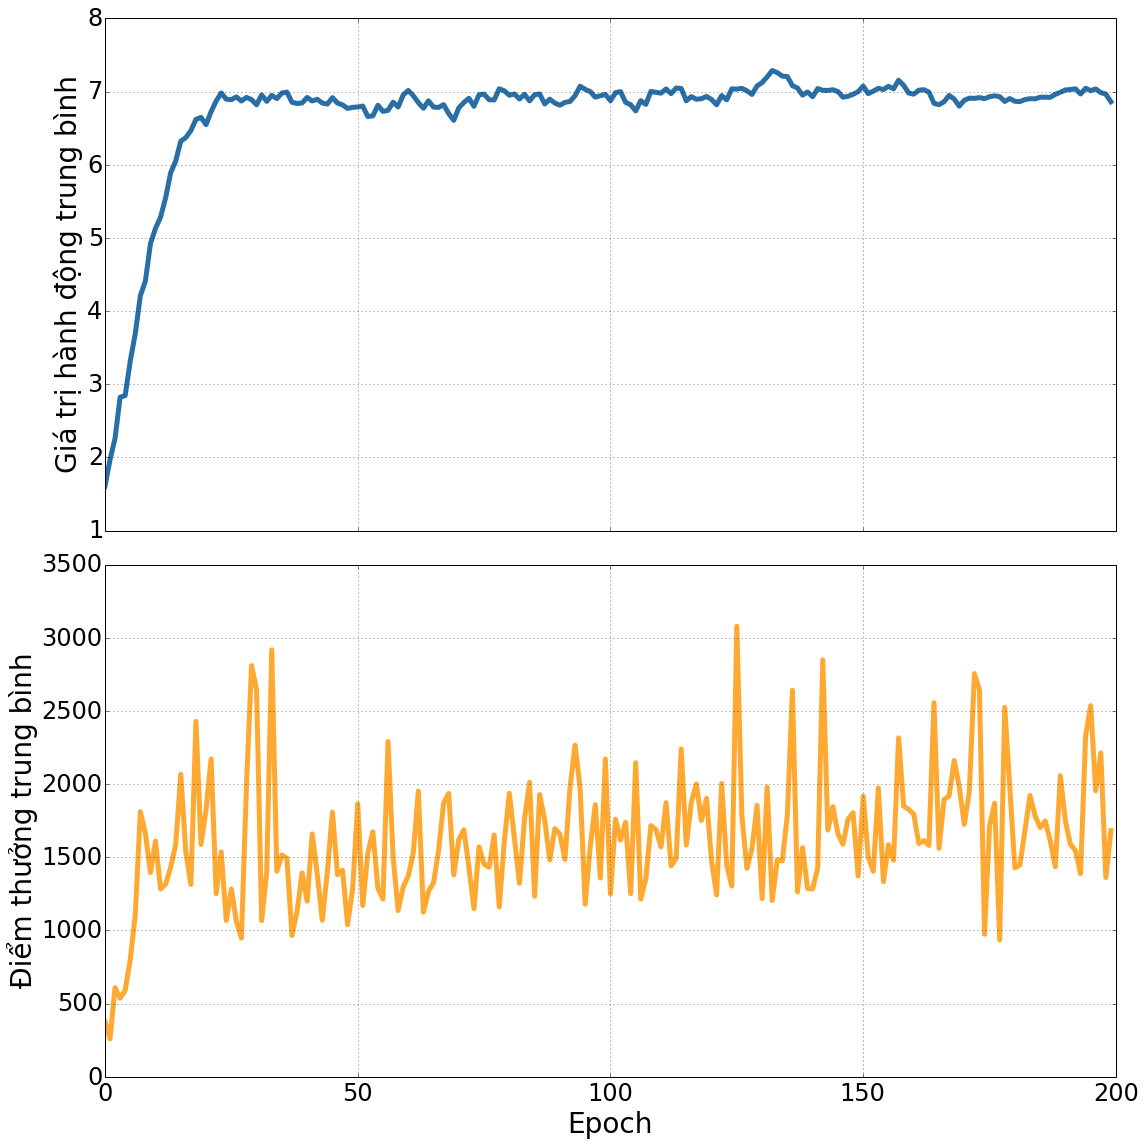

In [12]:
values = df.validate_values.values
rewards = df.evaluate_reward.values
print values.shape
print rewards.shape
fig_name = 'dqn_assault_values_rewards.png'
plot_double_values('Epoch', values, 'Giá trị hành động trung bình', rewards, 'Điểm thưởng trung bình', fig_name)

# Compare Q-learning and Double Q-learning

In [13]:
def plot_values(name1, values1, rewards1, name2, values2, rewards2, namex, namey1, namey2, fig_name = None):
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 16), sharex = True)
    ax1.set_ylabel(namey1, fontsize = 20)
    config_axis(ax1)
    ax1.plot(np.arange(len(values1)), values1, '--', linewidth = 5, color = '#2A6EA6', label = name1)
    ax1.plot(np.arange(len(values2)), values2, linewidth = 5, color = '#FFA933', label = name2)
    ax1.legend(loc = 'best', fontsize = 20)
    
    ax2.set_xlabel(namex, fontsize = 20)
    ax2.set_ylabel(namey2, fontsize = 20)
    config_axis(ax2)
    ax2.plot(np.arange(len(rewards1)), rewards1, '--', linewidth = 5, color = '#2A6EA6', label = name1)
    ax2.plot(np.arange(len(rewards2)), rewards2, linewidth = 5, color = '#FFA933', label = name2)

    ax2.legend(loc = 'best', fontsize = 20)
    fig.tight_layout()
    if fig_name is not None:
        plt.savefig(fig_name, dpi=100)
    plt.show()
    

In [14]:
df_dqn = pd.DataFrame.from_csv('./dqn/seaquest.csv')
dqn_values = df_dqn.validate_values
dqn_rewards = df_dqn.evaluate_reward
print dqn_values.shape
print dqn_rewards.shape

df_double = pd.DataFrame.from_csv('./double/seaquest.csv')
double_values = df_double.validate_values
double_rewards = df_double.evaluate_reward
print double_values.shape
print double_rewards.shape


(200,)
(200,)
(200,)
(200,)


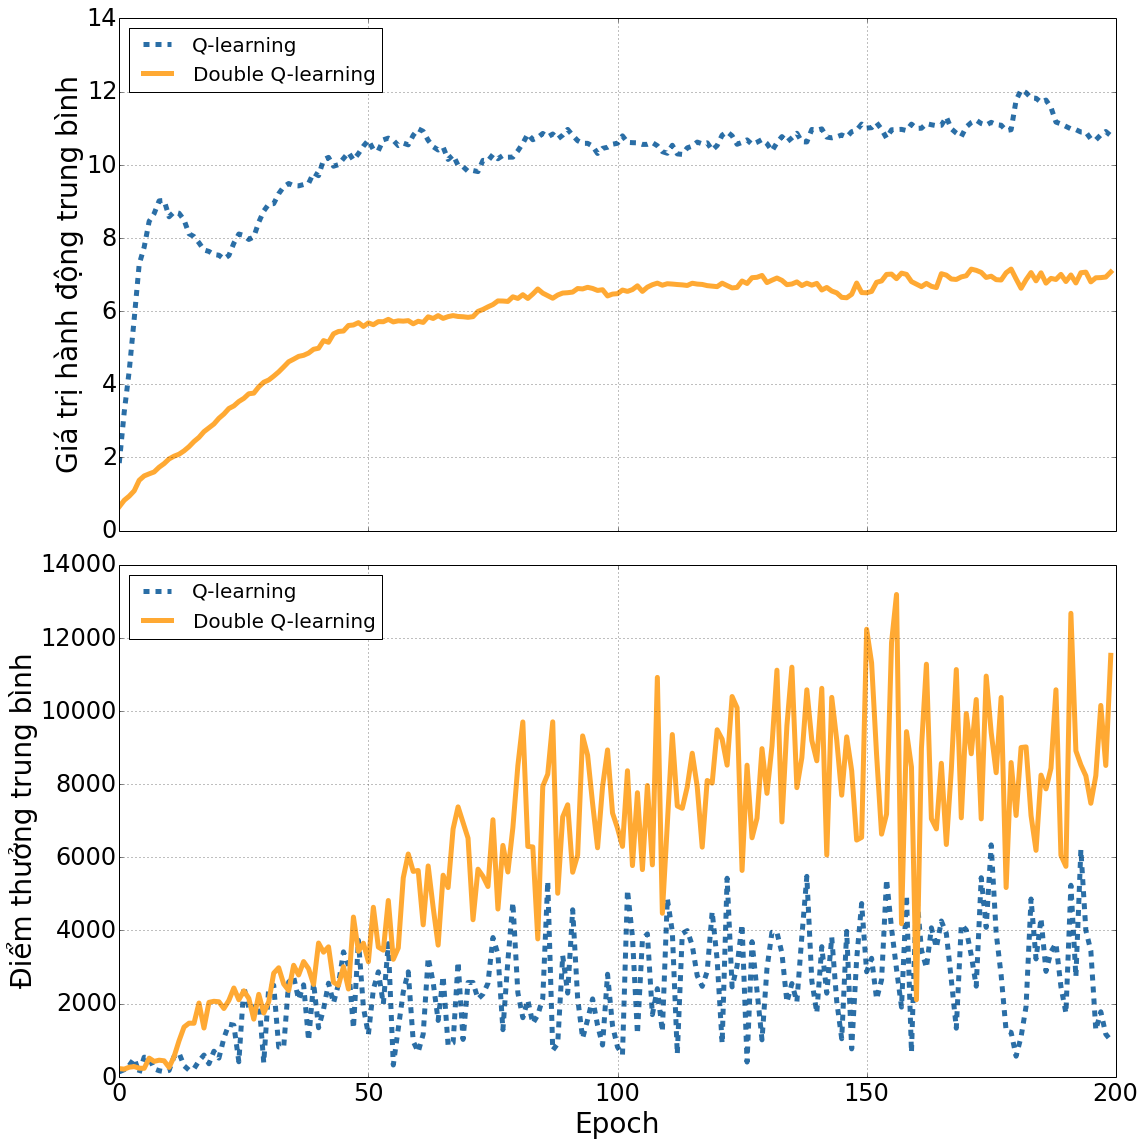

In [15]:
plot_values('Q-learning', dqn_values, dqn_rewards
            , 'Double Q-learning', double_values, double_rewards
            , 'Epoch', 'Giá trị hành động trung bình', 'Điểm thưởng trung bình'
           , 'double_compare.png')